# Explore 20 Years of Games

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

from collections import Counter

In [2]:
data = pd.read_csv('./ign.csv', index_col=0)

## Data overview

In [3]:
data.head(2)

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18625 entries, 0 to 18624
Data columns (total 10 columns):
score_phrase      18625 non-null object
title             18625 non-null object
url               18625 non-null object
platform          18625 non-null object
score             18625 non-null float64
genre             18589 non-null object
editors_choice    18625 non-null object
release_year      18625 non-null int64
release_month     18625 non-null int64
release_day       18625 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.6+ MB


## Score

In [5]:
score_counts = data['score_phrase'].value_counts()

In [6]:
ordered_score = ['Disaster', 'Unbearable' ,'Painful' ,'Awful' ,'Bad', 'Mediocre', 
                 'Okay' ,'Good' ,'Great', 'Amazing', 'Masterpiece']
counts = []
for score in ordered_score:
    counts.append(score_counts[score])

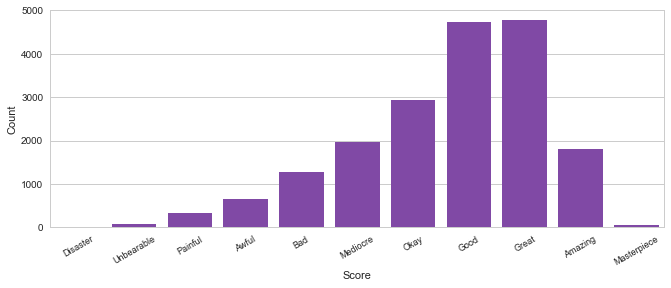

In [7]:
fig, ax = plt.subplots(figsize=(11, 4))
sns.barplot(x=ordered_score, y=counts, color='#833ab4')
ax.set(ylabel="Count", xlabel="Score")
ticks = plt.setp(ax.get_xticklabels(), rotation=30, fontsize=9)

## Generations

In [8]:
def get_platform_type(platform):    
    if platform in ['Nintendo 64', 'PlayStation']:
        return 'Fifth generation'
    elif platform in ['Dreamcast', 'PlayStation 2', 'GameCube', 'Xbox']:
        return 'Sixth generation'
    elif platform in ['Xbox 360', 'PlayStation 3', 'Wii', 'Nintendo DS', 'PlayStation Portable']:
        return 'Seventh generation'
    elif platform in ['Wii U', 'PlayStation 4', 'Xbox One', 'Nintendo 3DS', 'PlayStation Vita']:
        return 'Eighth generation'
    else:
        return 'Other'

data['platform_type'] = data['platform'].apply(get_platform_type)

### Fifth generation

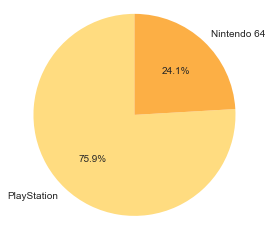

In [9]:
current_data = dict(data[data['platform_type'] == 'Fifth generation']['platform'].value_counts())

f, ax = plt.subplots(figsize=(4, 4))
labels = list(current_data.keys())
colors = ['#ffdc80', '#fcaf45']
plt.pie(list(current_data.values()), 
        labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

### Sixth generation

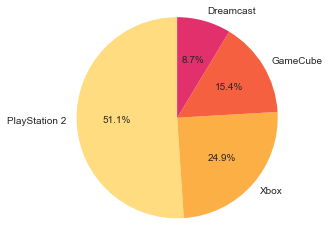

In [10]:
current_data = dict(data[data['platform_type'] == 'Sixth generation']['platform'].value_counts())

f, ax = plt.subplots(figsize=(4, 4))
labels = list(current_data.keys())
colors = ['#ffdc80', '#fcaf45', '#f56040', '#e1306c']
plt.pie(list(current_data.values()), 
        labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

### Seventh generation

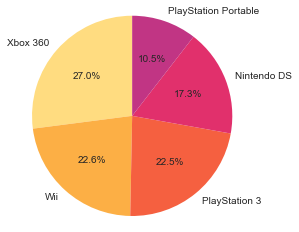

In [11]:
current_data = dict(data[data['platform_type'] == 'Seventh generation']['platform'].value_counts())

f, ax = plt.subplots(figsize=(4, 4))
labels = list(current_data.keys())
colors = ['#ffdc80', '#fcaf45', '#f56040', '#e1306c', '#c13584']
plt.pie(list(current_data.values()), 
        labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

### Eighth generation

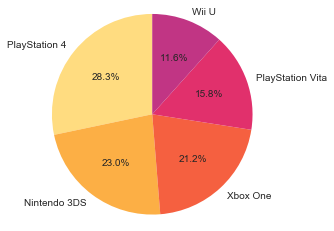

In [12]:
current_data = dict(data[data['platform_type'] == 'Eighth generation']['platform'].value_counts())

f, ax = plt.subplots(figsize=(4, 4))
labels = list(current_data.keys())
colors = ['#ffdc80', '#fcaf45', '#f56040', '#e1306c', '#c13584']
plt.pie(list(current_data.values()), 
        labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

## Editors choice

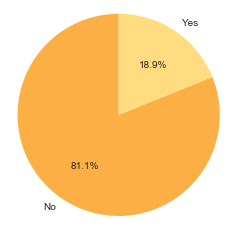

In [13]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['editors_choice'].value_counts().tolist(), 
        labels=['No', 'Yes'], colors=['#fcaf45', '#ffdc80'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

## Genre

In [14]:
data['genre'].value_counts()[0:15]

Action               3797
Sports               1916
Shooter              1610
Racing               1228
Adventure            1175
Strategy             1071
RPG                   980
Platformer            823
Puzzle                776
Action, Adventure     765
Simulation            567
Fighting              547
Music                 371
Action, RPG           330
Racing, Action        210
Name: genre, dtype: int64

## Good games

In [15]:
scores = data['score']

In [16]:
years = data['release_year']
months = data['release_month']
days = data['release_day']

In [17]:
all_games_by_years = dict(years.value_counts().sort_values())
all_games_by_months = dict(months.value_counts().sort_values())
all_games_by_days = dict(days.value_counts().sort_values())

In [18]:
good_games_by_years = dict()
good_games_by_months = dict()
good_games_by_days = dict()

In [19]:
for (year, month, day, score) in zip(years, months, days, scores):
    if (score > 7.0):
        for (period, good_games_dict) in zip([year, month, day],
                                             [good_games_by_years, 
                                              good_games_by_months, 
                                              good_games_by_days]):
            if period not in good_games_dict:
                good_games_dict[period] = 1
            else:
                good_games_dict[period] += 1

### By year

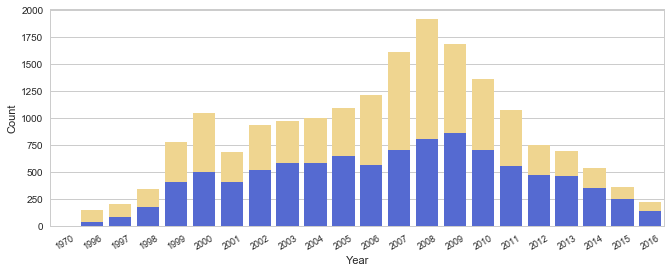

In [20]:
fig, ax = plt.subplots(figsize=(11, 4))

sns.barplot(x=list(all_games_by_years.keys()), y=list(all_games_by_years.values()), color='#ffdc80')
sns.barplot(x=list(good_games_by_years.keys()), y=list(good_games_by_years.values()), color='#405de6')

ax.set(ylabel="Count", xlabel="Year")
ticks = plt.setp(ax.get_xticklabels(), rotation=30, fontsize=9)

### By month

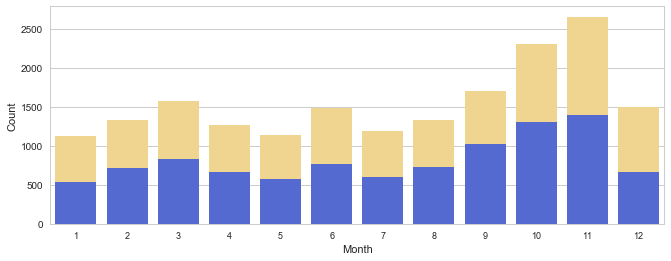

In [21]:
fig, ax = plt.subplots(figsize=(11, 4))

sns.barplot(x=list(all_games_by_months.keys()), y=list(all_games_by_months.values()), color='#ffdc80')
sns.barplot(x=list(good_games_by_months.keys()), y=list(good_games_by_months.values()), color='#405de6')

ax.set(ylabel="Count", xlabel="Month")
ticks = plt.setp(ax.get_xticklabels(), fontsize=9)

### By day

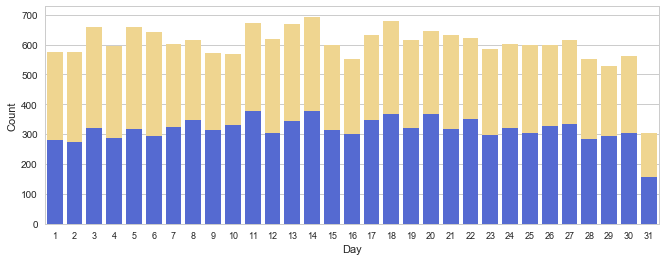

In [22]:
fig, ax = plt.subplots(figsize=(11, 4))

sns.barplot(x=list(all_games_by_days.keys()), y=list(all_games_by_days.values()), color='#ffdc80')
sns.barplot(x=list(good_games_by_days.keys()), y=list(good_games_by_days.values()), color='#405de6')

ax.set(ylabel="Count", xlabel="Day")
ticks = plt.setp(ax.get_xticklabels(), fontsize=9)

## Best games

In [23]:
years = sorted(data['release_year'].unique())

In [24]:
for year in years:
    curr_year_data = list(data[(data['release_year'] == year) & (data['score'] == 10)]['title'])
    if (curr_year_data != []):
        print(year, end=':\n')
        print(', '.join(curr_year_data))
        print()

1998:
The Legend of Zelda: Ocarina of Time

1999:
Pokemon Blue Version, Pokemon Red Version, Joust, Shanghai, Checkered Flag, Super Mario Bros. Deluxe, Soulcalibur, The Legend of Zelda: Link's Awakening DX, Mario Golf [Game Boy Color], Pokemon Yellow: Special Pikachu Edition, Sonic The Hedgehog: Pocket Adventure

2000:
SNK vs. Capcom: Match of the Millennium, Magical Tetris Challenge, Metal Gear Solid [2000], Pokemon Gold Version, Pokemon Silver Version

2001:
The Legend of Zelda: Oracle of Ages, The Legend of Zelda: Oracle of Seasons, Dragon Warrior III

2006:
Tornado Mania

2007:
The Legend of Zelda: Ocarina of Time

2008:
Grand Theft Auto IV (Special Edition), Grand Theft Auto IV (Special Edition), Grand Theft Auto IV, Grand Theft Auto IV, Metal Gear Solid 4: Guns of the Patriots, Metal Gear Solid 4: Guns of the Patriots (Limited Edition)

2010:
Super Mario Galaxy 2, Pac-Man Championship Edition DX, Pac-Man Championship Edition DX, Red Dead Redemption -- Undead Nightmare, Red Dead R